# 1. IMPORTANDO BIBLIOTECAS

In [1]:
#importar a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. FAZENDO A LEITURA DO ARQUIVO DE DADOS

In [2]:
#Leitura do arquivo
df = pd.read_excel("datasets/gravimetria_rsu_usina_sjb.xlsx")

In [3]:
#Exibindo as municipios do CMM
df.head(7)

,CD_MUN,Cidade,Ano,Latitude,Longitude,Populacao,Valor Bruto RSU (ton/dia),Kg.hab.dia,Cobranca,Matéria orgânica,...,Fraldas e papel higiênico,Alumínio,Diversos,Borrachas,Papel branco,Espumas,Subtotal,Perdas do processo,TOTAL,Umidade
0,3517703,Guará,2021,-20.429380,-47.824827,20626,14.32,0.694269,Sim,0.405,...,0.141,0.006,0.017,0.006,0.031,0.004,0.996,0.004,1,0.202
1,3521309,Ipuâ,2021,-20.447951,-48.014793,15917,10.88,0.683546,Sim,0.392,...,0.166,0.005,0.018,0.005,0.033,0.004,0.997,0.003,1,0.191
2,3536307,Patrocinio Paulista,2021,-20.641255,-47.281866,11958,8.21,0.686570,Sim,0.411,...,0.151,0.007,0.015,0.006,0.031,0.001,0.994,0.006,1,0.205
3,3543105,Ribeirão Corrente,2021,-20.458270,-47.589949,3778,2.61,0.690842,Sim,0.416,...,0.161,0.005,0.015,0.005,0.032,0.005,0.996,0.004,1,0.235
4,3544905,Sales Oliveira,2021,-20.771135,-47.839645,10864,7.47,0.687592,Sim,0.387,...,0.168,0.004,0.017,0.006,0.032,0.002,0.995,0.005,1,0.185
5,3549409,São Joaquim da Barra,2021,-20.577498,-47.876527,51382,40.42,0.786657,Sim,0.422,...,0.142,0.007,0.016,0.007,0.033,0.004,0.995,0.006,1,0.241
6,3549508,São José da Bela Vista,2021,-20.598759,-47.641875,7979,5.54,0.694323,Sim,0.389,...,0.156,0.007,0.018,0.006,0.034,0.002,0.995,0.005,1,0.172


In [11]:
df['Matéria orgânica'] = (df['Matéria orgânica']) 
df['Texteis, couros, borracha'] = (df['Trapos e panos'] + df['Borrachas']) 
df['Metais'] = (df['Metais ferrosos']) 
df['Vidro'] = (df['Vidros']) 
df['Plasticos'] = (df['PET'] + df['PEAD'] + df['PVC'] + df['PEBD'] + df['PP'] + df['PS'] + df['Outros plásticos']) 
df['Papel e papelão'] = (df['Papelão e jornal'] + df['Papel branco']) 
df['Embalagens multimarcas'] = (df['Embalagem longa vida']) 
df['Rejeitos'] = (df['Fraldas e papel higiênico'] + df['Terra e pedra'] + df['Pilhas e baterias']) 
df['Outros'] = (df['Diversos']) 

rsu_brasil = df[['Cidade', 'Matéria orgânica', 'Texteis, couros, borracha', 'Metais', 'Vidro', 'Plasticos', 'Papel e papelão', 'Embalagens multimarcas', 'Rejeitos', 'Outros']]

In [12]:
#Salva o Dataframe da gravimetria dos RSU em arquivo
rsu_brasil.to_excel("datasets/gravimetria_rsu_brasil_2020.xlsx")

In [13]:
# select two columns
materiais = df[['Matéria orgânica', 'Metais ferrosos', 'Vidros', 'PET', 'Papelão e jornal', 'Embalagem longa vida', 'Trapos e panos']]
materiais 

,Matéria orgânica,Metais ferrosos,Vidros,PET,Papelão e jornal,Embalagem longa vida,Trapos e panos
0,0.405,0.013,0.025,0.019,0.111,0.014,0.026
1,0.392,0.014,0.024,0.022,0.108,0.019,0.025
2,0.411,0.014,0.029,0.020,0.100,0.019,0.031
3,0.416,0.012,0.026,0.022,0.088,0.017,0.030
4,0.387,0.016,0.023,0.021,0.109,0.020,0.028
5,0.422,0.011,0.025,0.022,0.120,0.015,0.021
6,0.389,0.014,0.028,0.022,0.097,0.018,0.037


In [14]:
#Visualizando somente cidades e total de tonelada
cid_ton = df[['Cidade', 'Valor Bruto RSU (ton/dia)']]
cid_ton.head(7)

,Cidade,Valor Bruto RSU (ton/dia)
0,Guará,14.32
1,Ipuâ,10.88
2,Patrocinio Paulista,8.21
3,Ribeirão Corrente,2.61
4,Sales Oliveira,7.47
5,São Joaquim da Barra,40.42
6,São José da Bela Vista,5.54


In [15]:
#Mostraando o tipo de dados 
df.dtypes

CD_MUN                         int64
Cidade                        object
Ano                            int64
Latitude                     float64
Longitude                    float64
Populacao                      int64
Valor Bruto RSU (ton/dia)    float64
Kg.hab.dia                   float64
Cobranca                      object
Matéria orgânica             float64
Reciclaveis                  float64
Papelão e jornal             float64
Embalagem longa vida         float64
Isopor                       float64
PET                          float64
Vidros                       float64
PEAD                         float64
PVC                          float64
PEBD                         float64
PP                           float64
PS                           float64
Outros plásticos             float64
Metais ferrosos              float64
Pilhas e baterias            float64
Terra e pedra                float64
Madeira                      float64
Trapos e panos               float64
F

In [16]:
cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']
colors_blue = ['#8AA3CC', '#668DC2', '#4C7DB7', '#4774AB', '#416C9F', '#3A6190', '#33567F']
colors_rsu = ['#F58220', '#555A69', '#A5C8D0', '#2692D1', '#01976C', '#FDBA4D', '#24333E', '#B1B4B6', '#C25228']
ton = df["Valor Bruto RSU (ton/dia)"]
kg = df["Kg.hab.dia"]
cidades = df["Cidade"]
organicos = (df["Matéria orgânica"].sum() / 7) * 100
reciclaveis = (df["Reciclaveis"].sum() / 7) * 100
perdas = (df["Perdas do processo"].sum() / 7) * 100
explode = [0, 0, 0, 0, 0, 0, 0]

In [17]:
organicos

40.31428571428572

In [18]:
reciclaveis

59.22857142857144

In [19]:
perdas

0.4714285714285714

In [20]:
#Peso Bruto em tonelada
df['Valor Bruto RSU (ton/dia)'].value_counts().head(7)

14.32    1
10.88    1
8.21     1
2.61     1
7.47     1
40.42    1
5.54     1
Name: Valor Bruto RSU (ton/dia), dtype: int64

# 3. VALORES DE GRAVIMETRIA DOS RSU NO BRASIL - 2020

In [21]:
rsu_brasil.head(7)

,Cidade,Matéria orgânica,"Texteis, couros, borracha",Metais,Vidro,Plasticos,Papel e papelão,Embalagens multimarcas,Rejeitos,Outros
0,Guará,0.405,0.032,0.013,0.025,0.111,0.142,0.014,0.193,0.017
1,Ipuâ,0.392,0.030,0.014,0.024,0.115,0.141,0.019,0.210,0.018
2,Patrocinio Paulista,0.411,0.037,0.014,0.029,0.111,0.131,0.019,0.195,0.015
3,Ribeirão Corrente,0.416,0.035,0.012,0.026,0.112,0.120,0.017,0.210,0.015
4,Sales Oliveira,0.387,0.034,0.016,0.023,0.114,0.141,0.020,0.214,0.017
5,São Joaquim da Barra,0.422,0.028,0.011,0.025,0.099,0.153,0.015,0.191,0.016
6,São José da Bela Vista,0.389,0.043,0.014,0.028,0.116,0.131,0.018,0.205,0.018


In [22]:
data = [45.3, 14.1, 1.4, 10.4, 16.8, 2.7, 2.3, 5.6, 1.4] 
data

[45.3, 14.1, 1.4, 10.4, 16.8, 2.7, 2.3, 5.6, 1.4]

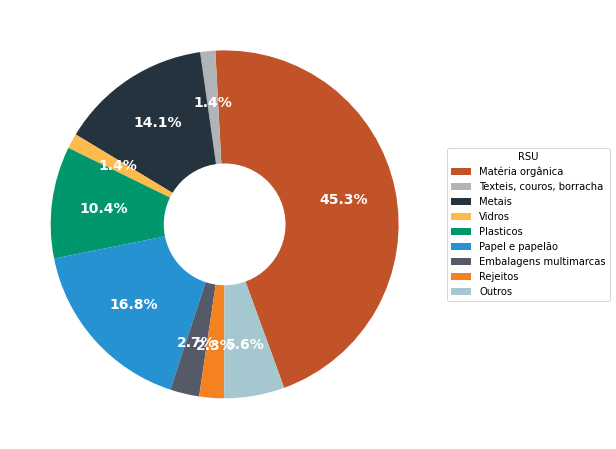

In [23]:
# grafico gravimetria rsu brasil 2020
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))


rsu_tipos = ['Matéria orgânica', 
             'Texteis, couros, borracha', 
             'Metais', 'Vidros', 
             'Plasticos', 
             'Papel e papelão', 
             'Embalagens multimarcas', 
             'Rejeitos', 'Outros'
            ]
colors_rsu = ['#C25228', 
              '#B1B4B6', 
              '#24333E', 
              '#FDBA4D', 
              '#01976C', 
              '#2692D1', 
              '#555A69', 
              '#F58220', 
              '#A5C8D0' ]
data = [45.3, 1.4, 14.1, 1.4, 10.4, 16.8, 2.7, 2.3, 5.6] 
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0]


wedges, texts, autotexts = ax.pie(data, 
                                  autopct='%1.1f%%', 
                                  colors=colors_rsu, 
                                  explode=explode,
                                  pctdistance=0.70,
                                  textprops = dict(color="w"),
                                  startangle=290,
                                  labeldistance = 1.2
                                 )

# draw circle
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


ax.legend(wedges, rsu_tipos,
          title="RSU",
          loc="center left",
          bbox_to_anchor=(1, 0, 0, 1),
          
         )

plt.setp(autotexts, size=14, weight="bold")


plt.show()

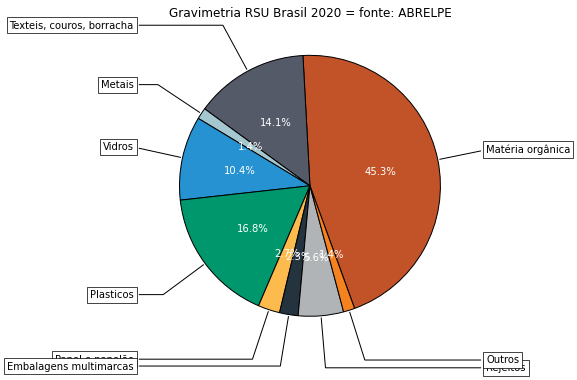

In [418]:
fig, ax = plt.subplots(figsize=(14, 6), subplot_kw=dict(aspect="equal"))

rsu_tipos = ['Matéria orgânica', 
             'Texteis, couros, borracha', 
             'Metais', 'Vidros', 
             'Plasticos', 
             'Papel e papelão', 
             'Embalagens multimarcas', 
             'Rejeitos', 'Outros'
            ]
# data = rsu_brasil
colors_rsu = ['#C25228', '#555A69', '#A5C8D0', '#2692D1', '#01976C', '#FDBA4D', '#24333E', '#B1B4B6', '#F58220' ]
data = [45.3, 14.1, 1.4, 10.4, 16.8, 2.7, 2.3, 5.6, 1.4] 
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0]


# recipe = ["225 g flour",
#           "90 g sugar",
#           "1 egg",
#           "60 g butter",
#           "100 ml milk",
#           "1/2 package of yeast"]

recipe = ['Matéria orgânica', 
             'Texteis, couros, borracha', 
             'Metais', 'Vidros', 
             'Plasticos', 
             'Papel e papelão', 
             'Embalagens multimarcas', 
             'Rejeitos', 'Outros'
            ]



# data = [225, 90, 50, 60, 100, 5]

# wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct='%1.1f%%', 
                                  colors=colors_rsu, 
                                  explode=explode,
                                  pctdistance=0.55,
                                  textprops = dict(color="w"),
                                  startangle=290,
                                  labeldistance = 1.0,
                                  wedgeprops = {"ec": "k"}
                                 )


bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Gravimetria RSU Brasil 2020 = fonte: ABRELPE")

plt.show()

# 4. VALORES ORGANICOS, RECICLAVEIS E PERDAS

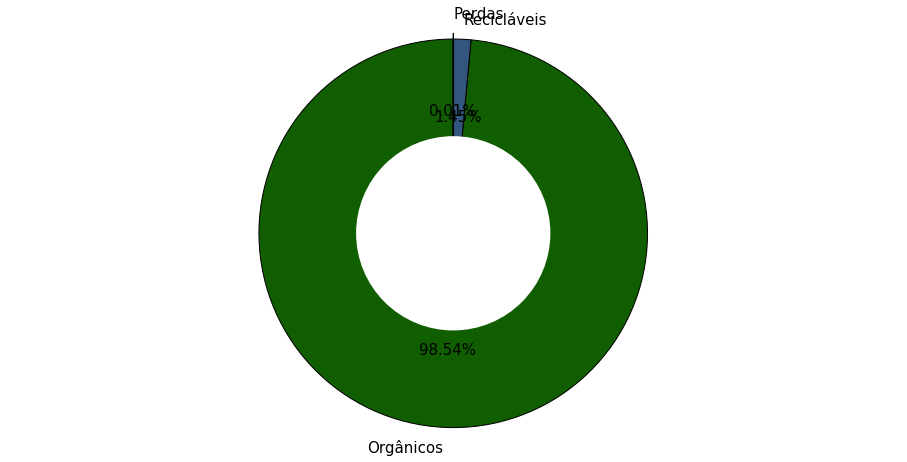

In [444]:
# Criando nosso conjunto de dados
labels='Orgânicos','Recicláveis','Perdas'
sizes=[organicos,reciclaveis,perdas]

#Estamos criando a representação, area de plotagem
fig1, ax1 = plt.subplots(figsize=(16, 8))

# Criando o gráfico
ax1.pie(sizes, 
        labels=labels, 
        colors=['#105E00','#33567F','#B73DB6'], 
        autopct='%1.2f%%', 
        #shadow=True, 
        labeldistance = 1.1,
        explode = [0, 0, .03],
        wedgeprops = {"ec": "k"},
        textprops = {"fontsize": 15},
        startangle=90)

# Com esa opção o gráfico ficará em circulo
ax1.axis('equal')

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


# Salva imagem do gráfico
plt.savefig('imagens/porcentagem-tipos-rosca-blue.png', dpi=600, bbox_inches='tight')


# Mostra o grafico
plt.show()

# 5. TOTAL KG/DIA POR HABITANTE 

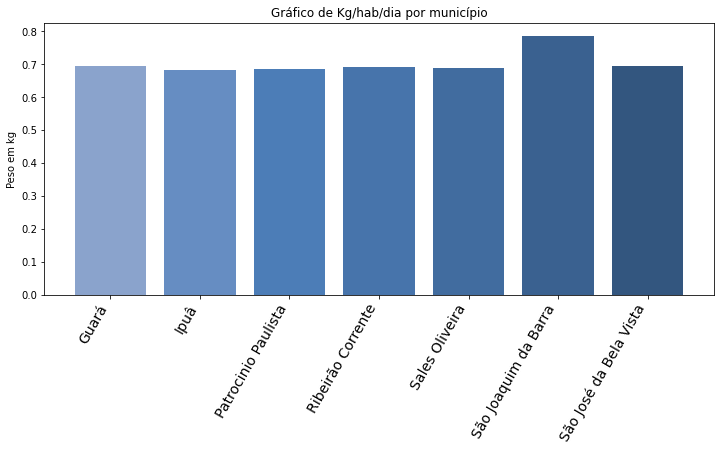

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(cidades, kg, color=colors_blue);
ax.set_title('Gráfico de Kg/hab/dia por município')
ax.set_ylabel('Peso em kg')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

#percentual = 0
#for i, x enumerate(percentual)
#   plt.text(i, x, f'{x}', ha='center',fontsize=' ')

# Salva imagem do gráfico
plt.savefig('imagens/kg-dia-hab-bar.png', dpi=600, bbox_inches='tight')

plt.show()

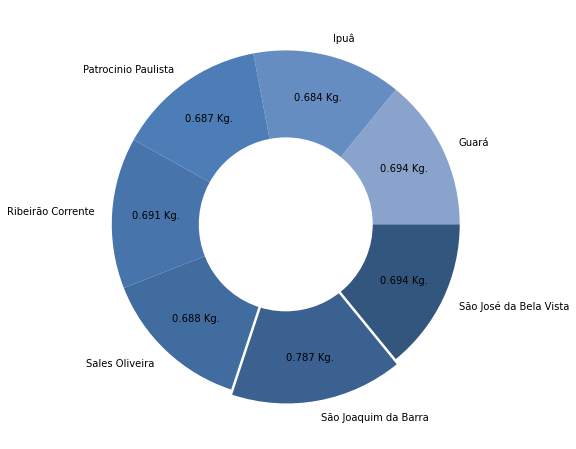

In [25]:
explode = (0, 0, 0, 0, 0, 0.03, 0)
fig, ax = plt.subplots(figsize=(16, 8))
  
plt.pie(kg, colors=colors_blue, labels=cidades,
        autopct=lambda v:f"{sum(kg)*v/100:.3f} Kg.", pctdistance=0.75,
        explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
#plt.title('Total Tonelada/dia por Município')

# Salva imagem do gráfico
plt.savefig('imagens/kg-dia-hab-rosca-blue.png', dpi=600, bbox_inches='tight')

plt.show() 

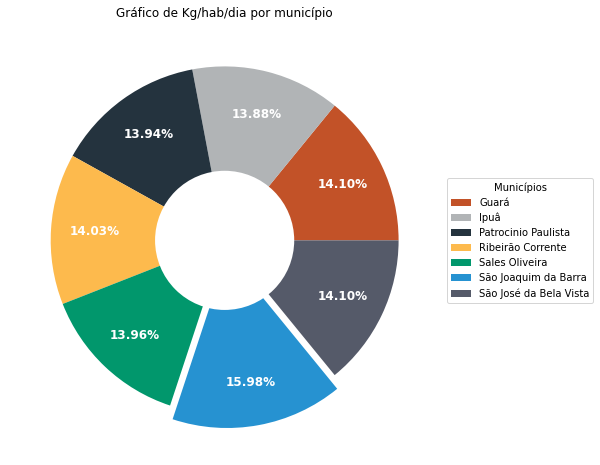

In [28]:
#importar a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = kg

wedges, texts, autotexts = ax.pie(kg, 
                                  # autopct=lambda v:f"{sum(kg)*v/100:.3f} Kg.", 
                                  autopct='%1.2f%%', 
                                  pctdistance=0.75,
                                  textprops=dict(color="w"),
                                  colors=colors_rsu,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

ax.set_title('Gráfico de Kg/hab/dia por município')

  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-kg-dia-rosca.png', dpi=400, bbox_inches='tight')

plt.show()

# 6. TOTAL TONELADA/DIA POR MUNICÍPIO

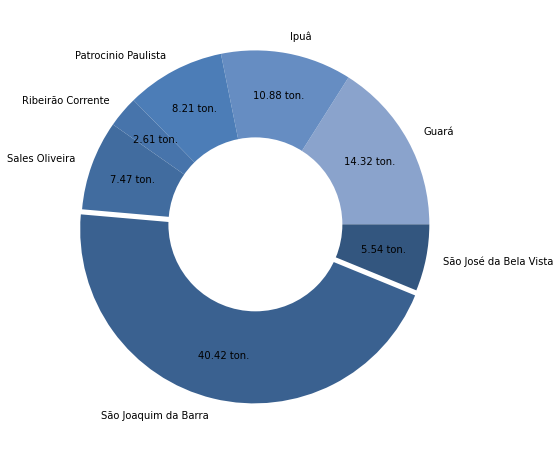

In [105]:
explode = (0, 0, 0, 0, 0, 0.03, 0)
fig, ax = plt.subplots(figsize=(16, 8))
  
# Pie Chart
#plt.pie(ton, colors=colors_green, labels=cidades,
#        autopct='%1.2f%%', pctdistance=0.75,
#        explode=variavel)

plt.pie(ton, colors=colors_blue, labels=cidades,
        autopct=lambda v:f"{sum(ton)*v/100:.2f} ton.", pctdistance=0.75,
        explode=explode)

  
# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
#plt.title('Total Tonelada/dia por Município')

# Salva imagem do gráfico
plt.savefig('imagens/toneladas-total-rosca-blue.png', dpi=600, bbox_inches='tight')

plt.show() 

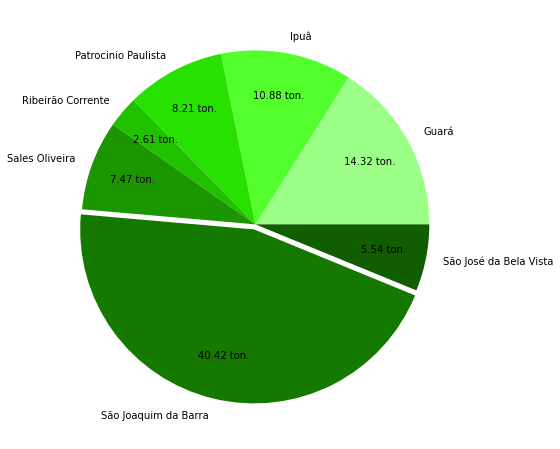

In [106]:
# explosion
explode = (0, 0, 0, 0, 0, 0.03, 0)

fig, ax = plt.subplots(figsize=(16, 8))
  
plt.pie(ton, colors=colors_green, labels=cidades,
        autopct=lambda v:f"{sum(ton)*v/100:.2f} ton.", pctdistance=0.75,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 3), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
#plt.title('Total Tonelada/dia por Município')

# Salva imagem do gráfico
plt.savefig('imagens/toneladas-total-pie-green.png', dpi=600, bbox_inches='tight')
  
# Displaing Chart
plt.show() 

In [30]:
ton

0    14.32
1    10.88
2     8.21
3     2.61
4     7.47
5    40.42
6     5.54
Name: Valor Bruto RSU (ton/dia), dtype: float64

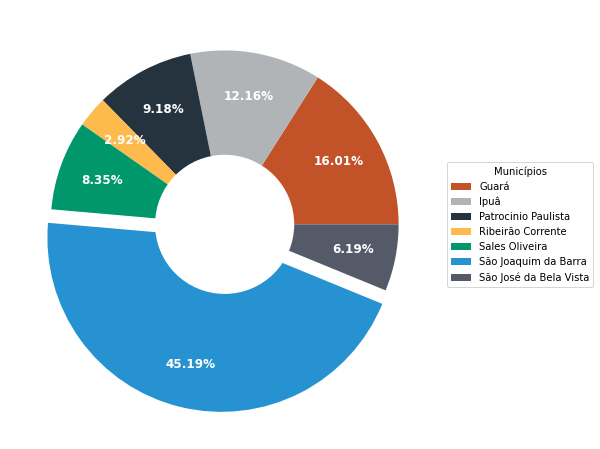

In [33]:
#importar a biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(ton, 
                                  autopct='%1.2f%%', 
                                  pctdistance=0.75,
                                  textprops=dict(color="w"),
                                  colors=colors_rsu,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                 )

ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

# ax.set_title('Gráfico de Tonelada/dia por município')

  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-tonelada-total-rosca.png', dpi=400, bbox_inches='tight')

plt.show()

# 7. MEDIA TOTAL TONELADA/DIA DE ORGANICOS, RECICLÁVEIS E REJEITOS

## A) Total Geral

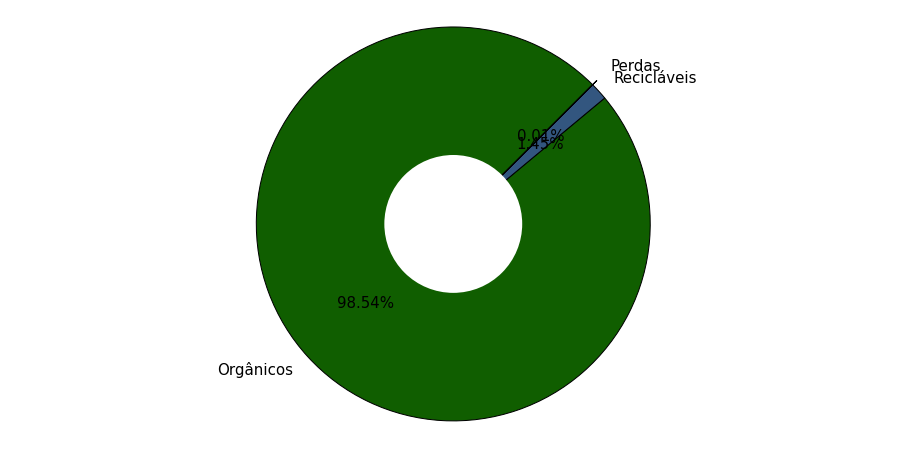

In [107]:
# Criando nosso conjunto de dados
labels='Orgânicos','Recicláveis','Perdas'
sizes=[organicos,reciclaveis,perdas]

#Estamos criando a representação, area de plotagem
fig1, ax1 = plt.subplots(figsize=(16, 8))

ax1.pie(sizes, 
        labels=labels, 
        colors=['#105E00','#33567F','#57DE79'], 
        autopct='%1.2f%%', 
        startangle=45,
        labeldistance = 1.1,
        explode = [0, 0, .03],
        wedgeprops = {"ec": "k"},
        textprops = {"fontsize": 15}
       )


# Com esa opção o gráfico ficará em circulo
ax1.axis('equal')

# draw circle
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Salva imagem do gráfico
plt.savefig('imagens/porcentagem-tipos-rosca.png', dpi=600, bbox_inches='tight')

# Mostra o grafico
plt.show()

## B) Total de tipos por municípios

In [108]:
# Lista os indices das cidades
tipos_rsu = df[['Matéria orgânica', 'Reciclaveis', 'Perdas do processo']]
for value in tipos_rsu:
    print(value)

Matéria orgânica
Reciclaveis
Perdas do processo


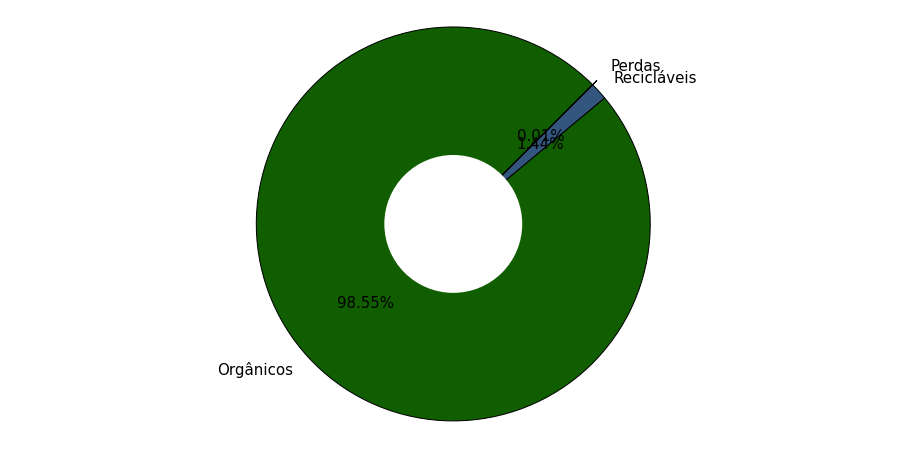

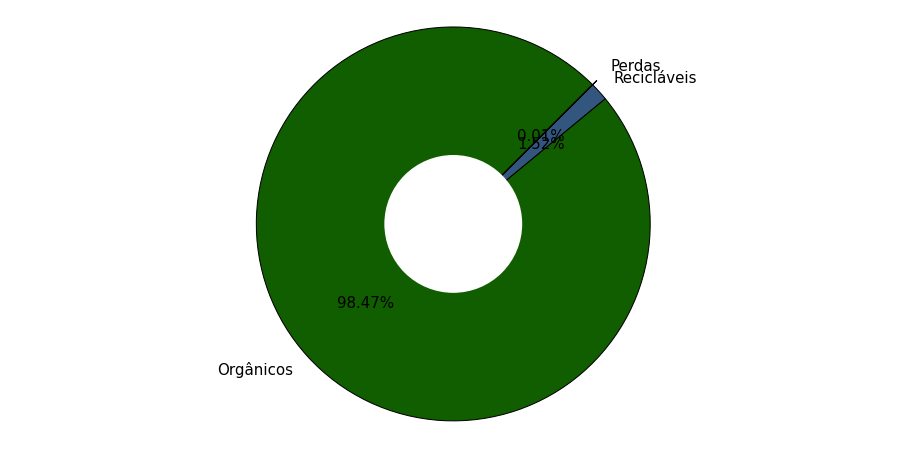

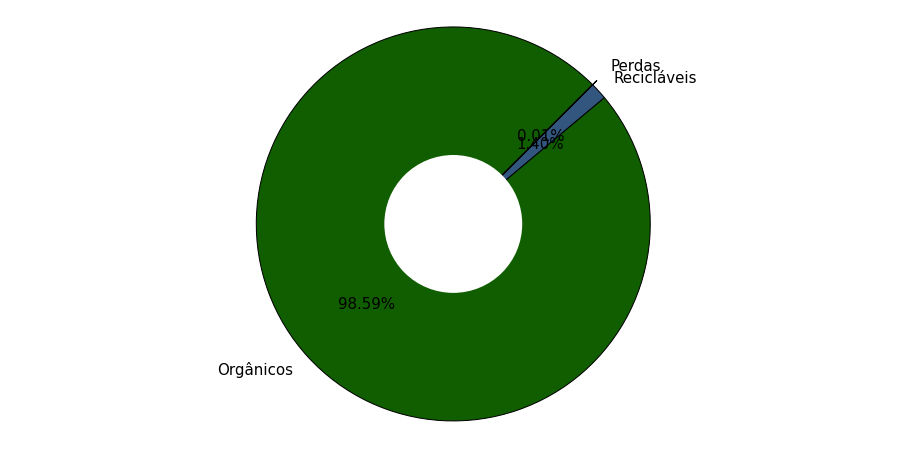

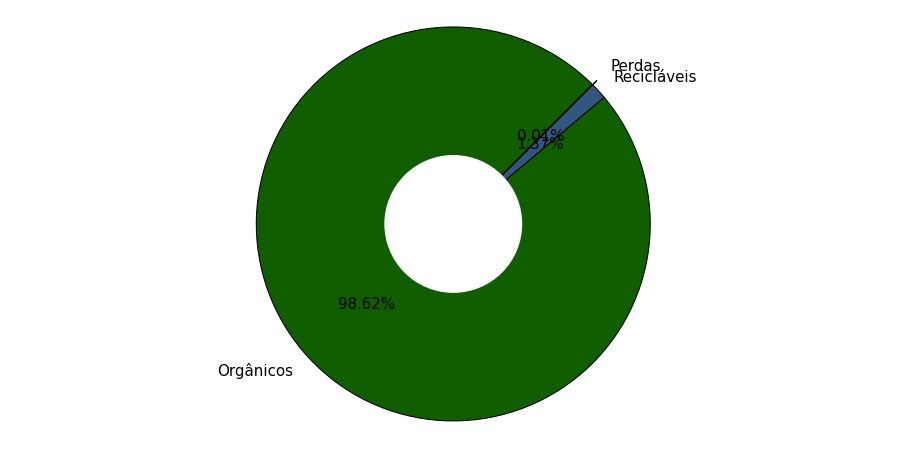

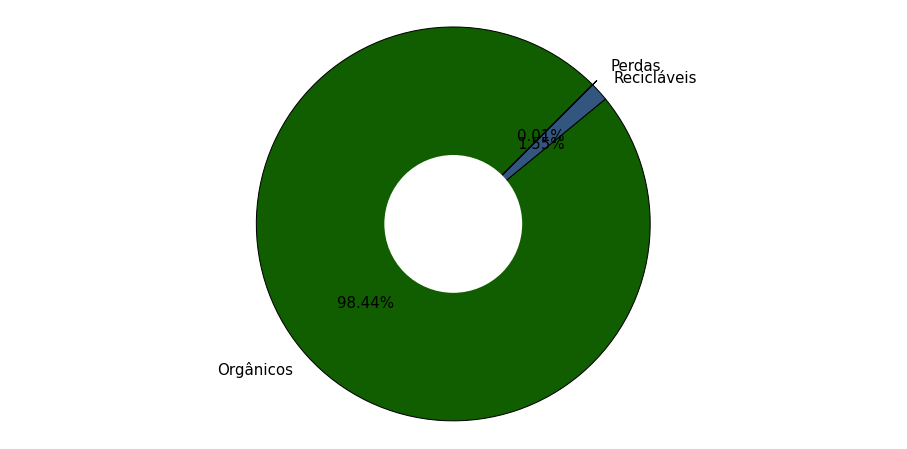

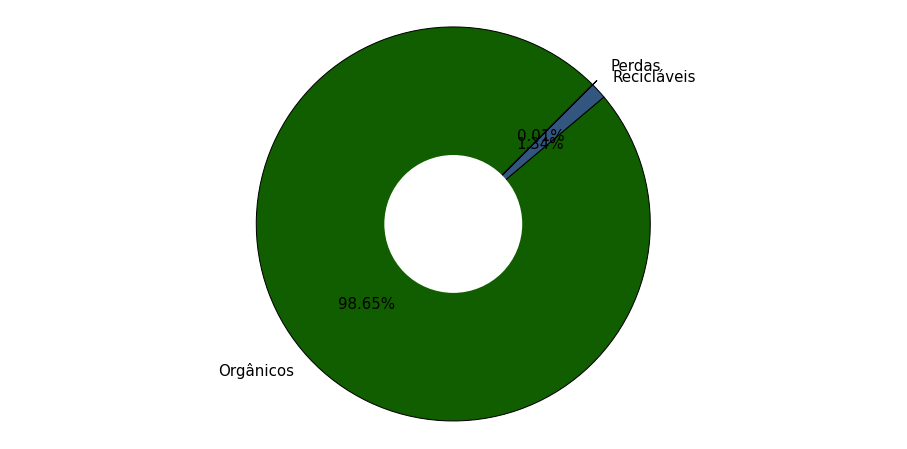

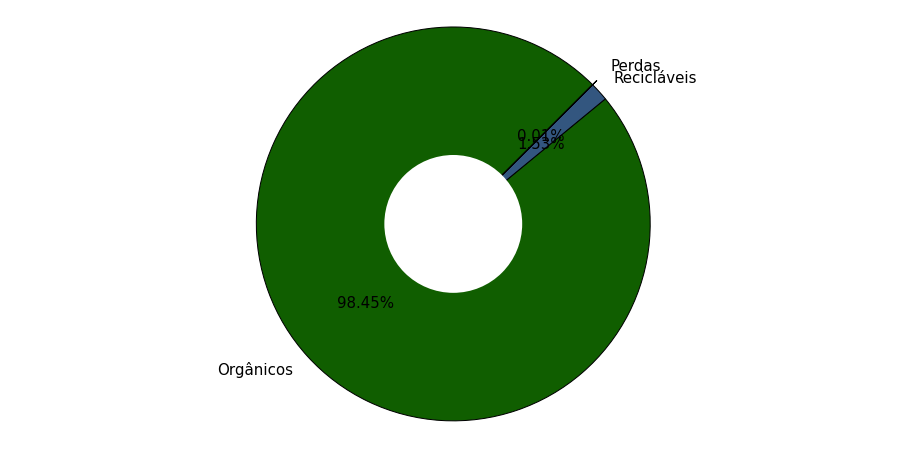

In [109]:
i = 0
tipos_rsu = df[['Matéria orgânica', 'Reciclaveis', 'Perdas do processo']]
for i in range(7):
    tipos = tipos_rsu.iloc[i] * 100
    # print(tipos)
    
    # Criando nosso conjunto de dados
    labels='Orgânicos','Recicláveis','Perdas'
    sizes=tipos

    #Estamos criando a representação, area de plotagem
    fig1, ax1 = plt.subplots(figsize=(16, 8))

    ax1.pie(sizes, 
        labels=labels, 
        colors=['#105E00','#33567F','#57DE79'], 
        autopct='%1.2f%%', 
        startangle=45,
        labeldistance = 1.1,
        explode = [0, 0, .03],
        wedgeprops = {"ec": "k"},
        textprops = {"fontsize": 15}
       )


    # Com esa opção o gráfico ficará em circulo
    ax1.axis('equal')

    # draw circle
    centre_circle = plt.Circle((0, 0), 0.35, fc='white')
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)

    # Salva imagem do gráfico
    plt.savefig('imagens/porcentagem-tipos-rosca-' + cidades[i] + '.png', dpi=600, bbox_inches='tight')

    # Mostra o grafico
    plt.show()

# 8. TOTAL TONELADAS/DIA POR MATERIAL

## A) Total Geral

In [110]:
materiais = df[['Matéria orgânica', 'Metais ferrosos', 'Vidros', 'PET', 'Papelão e jornal', 'Embalagem longa vida', 'Trapos e panos']]
materiais

,Matéria orgânica,Metais ferrosos,Vidros,PET,Papelão e jornal,Embalagem longa vida,Trapos e panos
0,40.5,0.013,0.025,0.019,0.111,0.014,0.026
1,39.2,0.014,0.024,0.022,0.108,0.019,0.025
2,41.1,0.014,0.029,0.020,0.100,0.019,0.031
3,41.6,0.012,0.026,0.022,0.088,0.017,0.030
4,38.7,0.016,0.023,0.021,0.109,0.020,0.028
5,42.2,0.011,0.025,0.022,0.120,0.015,0.021
6,38.9,0.014,0.028,0.022,0.097,0.018,0.037


In [111]:
teste = df.groupby(df["PET"]).sum() * 100
# teste = materiais.["PET"].sum() * 100
teste.head(7)

,CD_MUN,Ano,Latitude,Longitude,Populacao,Valor Bruto RSU (ton/dia),Kg.hab.dia,Matéria orgânica,Reciclaveis,Papelão e jornal,...,Perdas do processo,TOTAL,Umidade,"Texteis, couros, borracha",Metais,Plasticos,Papel e papelão,Embalagens multimarcas,Rejeitos,Outros
PET,,,,,,,,,,,,,,,,,,,,,
0.019,351770300,202100,-2042.9380,-4782.4827,2062600,1432.0,69.426937,4050.0,59.1,11.1,...,0.4,100,20.2,320.0,130.0,1110.0,1420.0,140.0,1930.0,170.0
0.020,353630700,202100,-2064.1255,-4728.1866,1195800,821.0,68.656966,4110.0,58.3,10.0,...,0.6,100,20.5,370.0,140.0,1110.0,1310.0,190.0,1950.0,150.0
0.021,354490500,202100,-2077.1135,-4783.9645,1086400,747.0,68.759205,3870.0,60.8,10.9,...,0.5,100,18.5,340.0,160.0,1140.0,1410.0,200.0,2140.0,170.0
0.022,1416333100,808400,-8208.2478,-19112.3144,7905600,5945.0,285.536701,16190.0,236.4,41.3,...,1.8,400,83.9,1360.0,510.0,4420.0,5450.0,690.0,8160.0,670.0


## B) Total de Materiais Por Município - Vidros

In [112]:
#Vidro por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Vidros"].sum() * 100)) / 100
cidades = df["Cidade"]

In [113]:
variavel

Cidade
Guará                      358.00
Ipuâ                       261.12
Patrocinio Paulista        238.09
Ribeirão Corrente           67.86
Sales Oliveira             171.81
São Joaquim da Barra      1010.50
São José da Bela Vista     155.12
dtype: float64

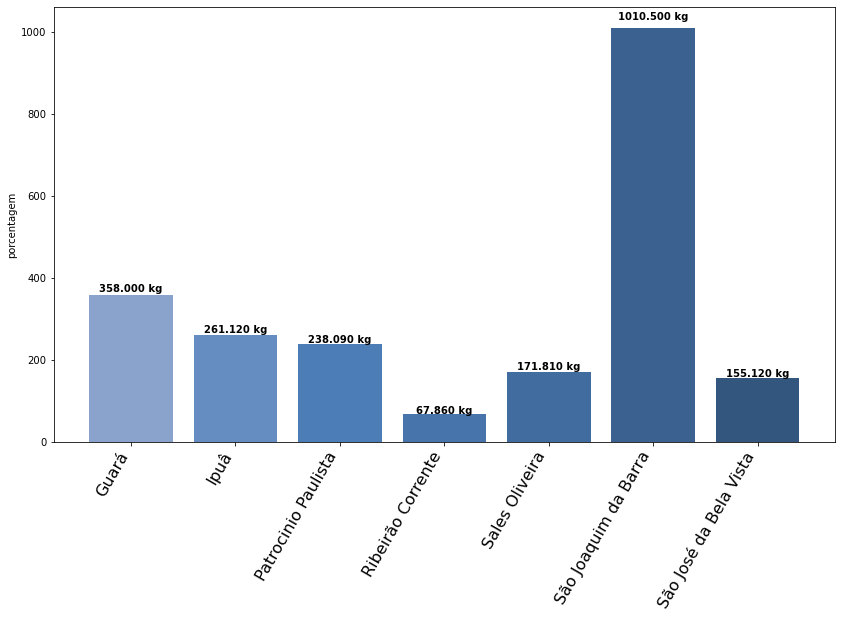

In [114]:
fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

# graph = ax.bar(cidades, variavel, width, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
graph = ax.bar(cidades, variavel, color=colors_blue)
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             '{:1.3f} kg'.format(variavel[i]),
             color='black',
             ha='center',
             weight='bold')
    i+=1

#            '{:1.2f}%'.format(v/variavel[i]*100)

plt.savefig('imagens/grafico-pet-bar-porcentagem-topo.png', dpi=600, bbox_inches='tight')


plt.show()

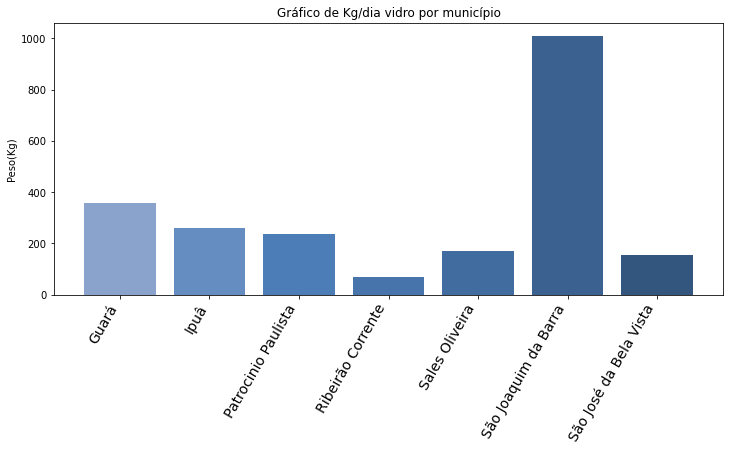

In [115]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Kg/dia vidro por município')
ax.set_ylabel('Peso(Kg)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/grafico-vidro-bar-normal.png', dpi=600, bbox_inches='tight')

plt.show()

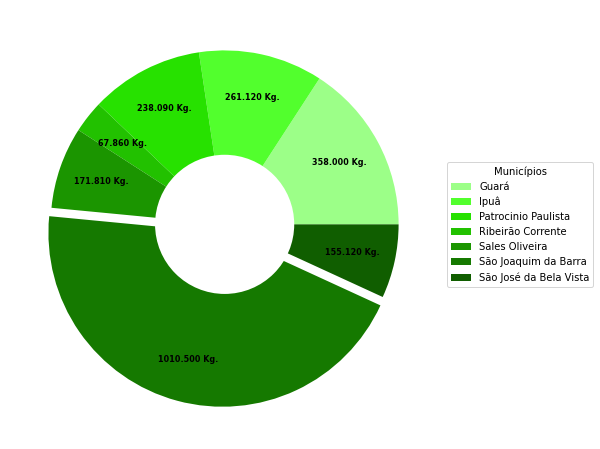

In [116]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-pet-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

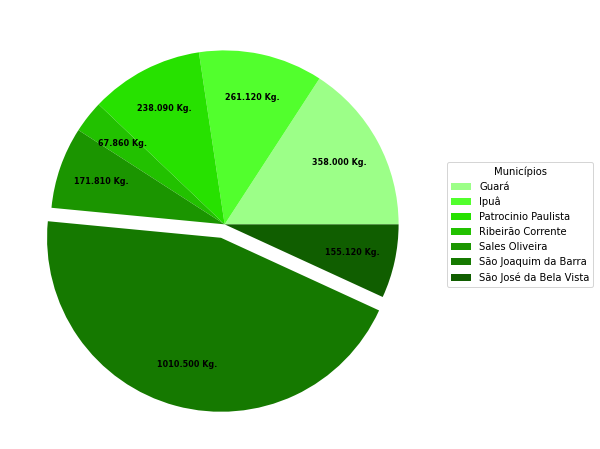

In [117]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/grafico-vidro-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## C) Total de Materiais Por Município - Pet

In [312]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["PET"].sum() * 100)) / 100
cidades = df["Cidade"]

In [313]:
variavel

Cidade
Guará                     272.08
Ipuâ                      239.36
Patrocinio Paulista       164.20
Ribeirão Corrente          57.42
Sales Oliveira            156.87
São Joaquim da Barra      889.24
São José da Bela Vista    121.88
dtype: float64

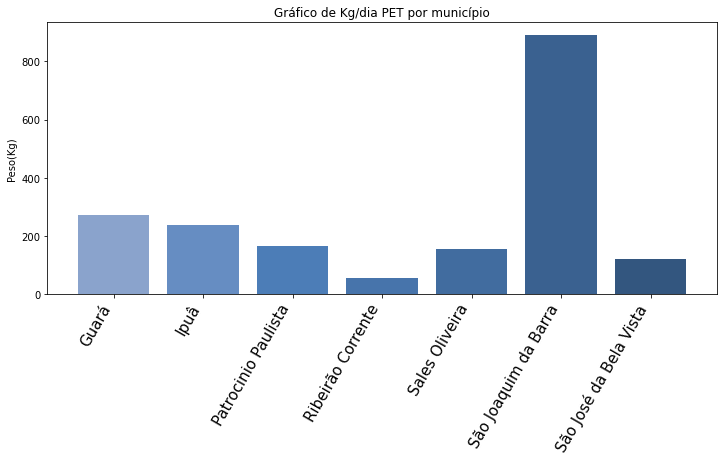

In [314]:
fig, ax = plt.subplots(figsize=(12, 5))

cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Kg/dia PET por município')
ax.set_ylabel('Peso(Kg)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=15,
         horizontalalignment='right')

plt.savefig('imagens/toneladas-pet.png', dpi=600, bbox_inches='tight')
plt.show()

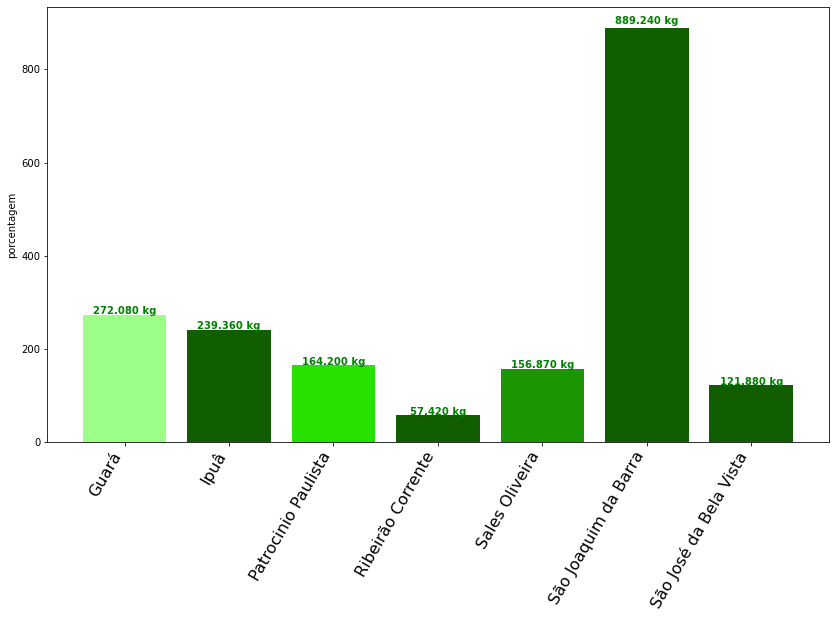

In [315]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/toneladas-pet-bar-green.png', dpi=600, bbox_inches='tight')


plt.show()

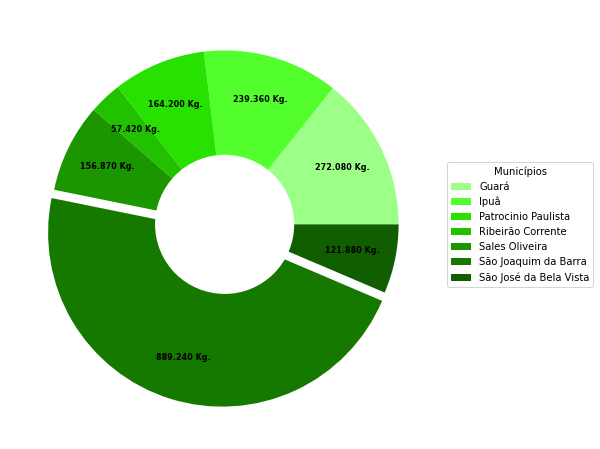

In [316]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-pet-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

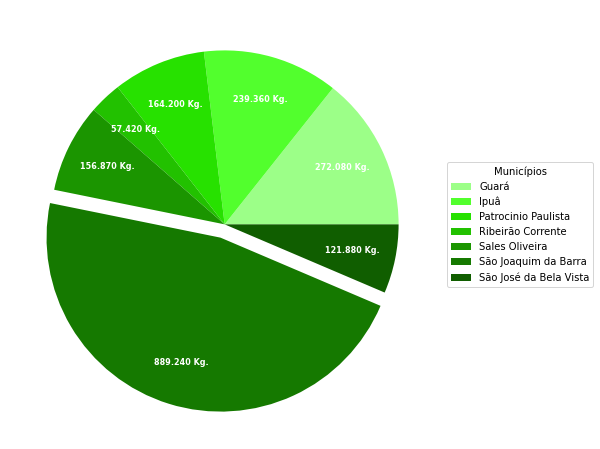

In [317]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="w")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/grafico-pet-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## D) Total de Materiais Por Município - PVC

In [318]:
#PVC por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["PVC"].sum() * 100)) / 100
cidades = df["Cidade"]

In [319]:
variavel

Cidade
Guará                      85.92
Ipuâ                       65.28
Patrocinio Paulista        41.05
Ribeirão Corrente          13.05
Sales Oliveira             37.35
São Joaquim da Barra      202.10
São José da Bela Vista     27.70
dtype: float64

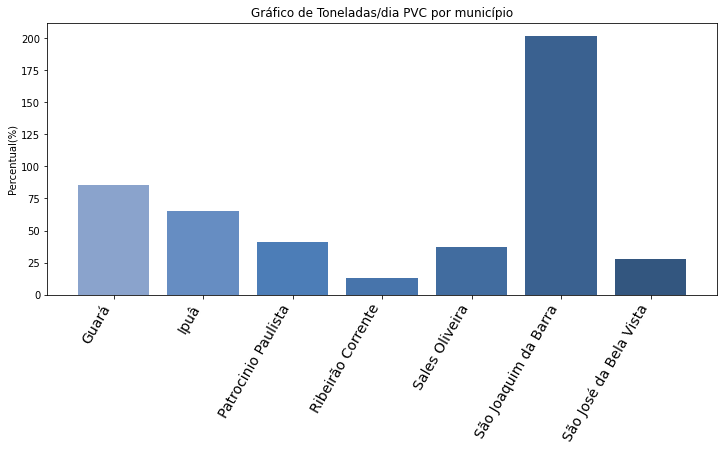

In [320]:
fig, ax = plt.subplots(figsize=(12, 5))

cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia PVC por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')
plt.savefig('imagens/grafico-pvc-bar-normal.png', dpi=600, bbox_inches='tight')
plt.show()

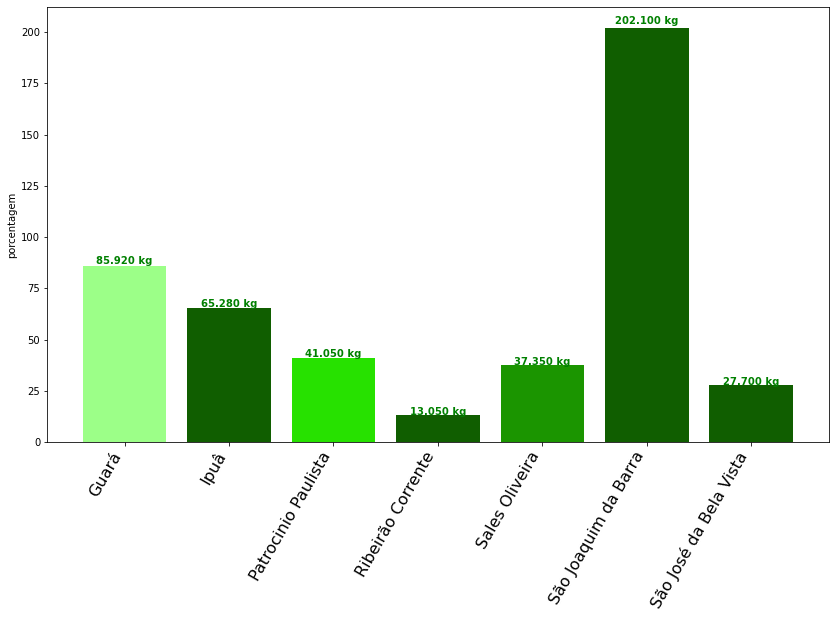

In [321]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/grafico-pvc-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

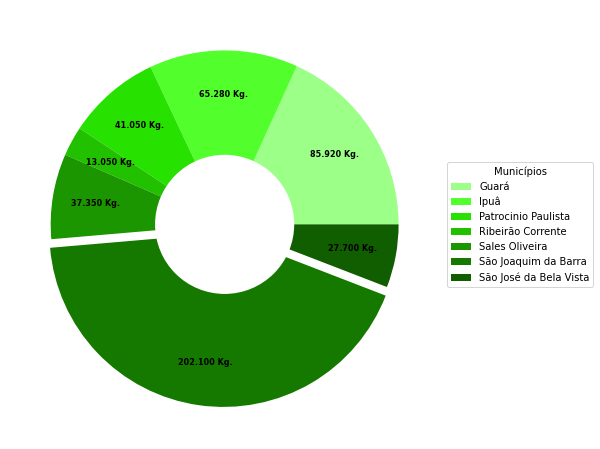

In [322]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-pvc-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

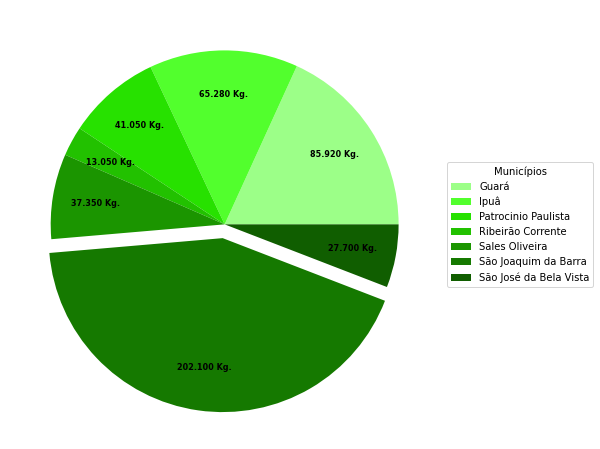

In [323]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/grafico-pvc-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## E) Total de Materiais Por Município - Isopor

In [324]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Isopor"].sum() * 100)) / 100
cidades = df["Cidade"]

In [325]:
variavel

Cidade
Guará                     171.84
Ipuâ                       87.04
Patrocinio Paulista        65.68
Ribeirão Corrente          20.88
Sales Oliveira             52.29
São Joaquim da Barra      363.78
São José da Bela Vista     44.32
dtype: float64

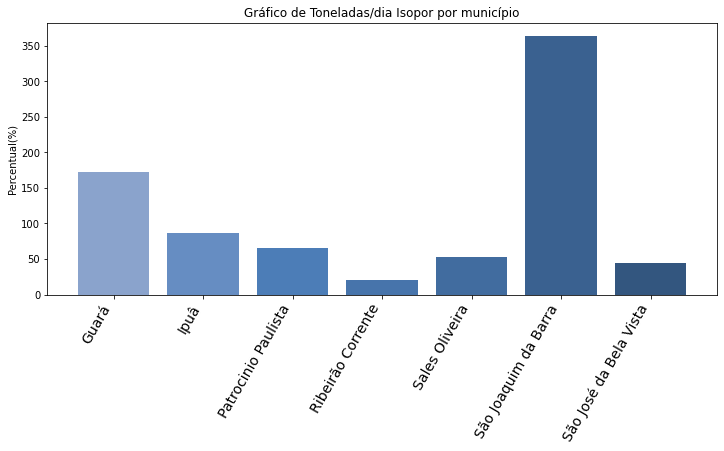

In [326]:
fig, ax = plt.subplots(figsize=(12, 5))

cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia Isopor por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/grafico-bar-isopor.png', dpi=600, bbox_inches='tight')
plt.show()

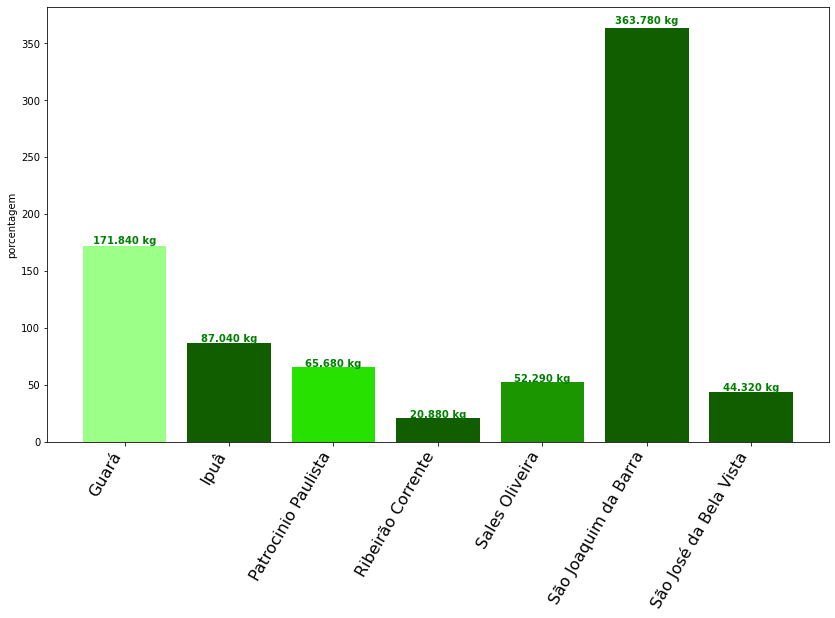

In [327]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/grafico-isopor-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

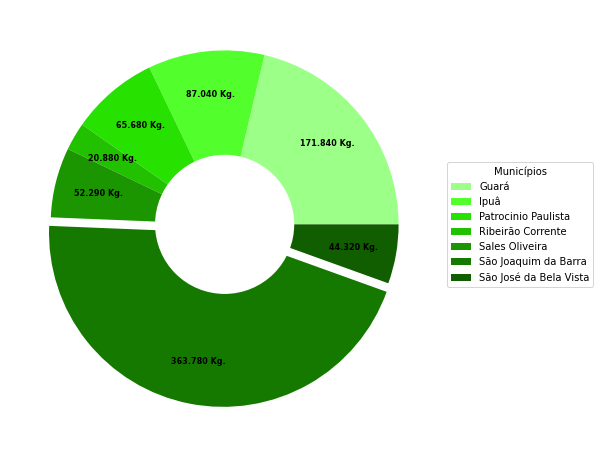

In [328]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-isopor-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

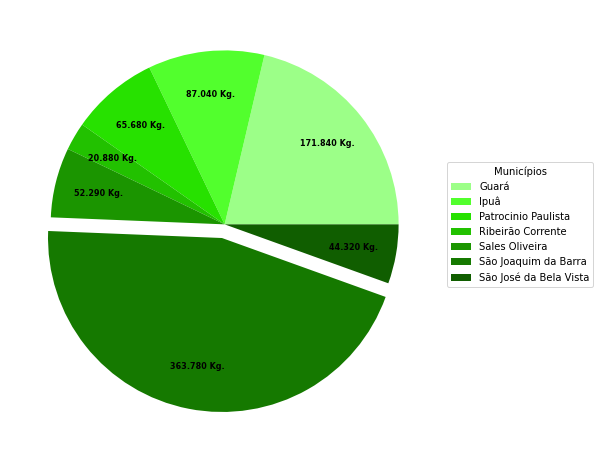

In [329]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/grafico-isopor-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## F) Total de Materiais Por Município - Metais

In [330]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Metais ferrosos"].sum() * 100)) / 100
cidades = df["Cidade"]

In [331]:
variavel

Cidade
Guará                     186.16
Ipuâ                      152.32
Patrocinio Paulista       114.94
Ribeirão Corrente          31.32
Sales Oliveira            119.52
São Joaquim da Barra      444.62
São José da Bela Vista     77.56
dtype: float64

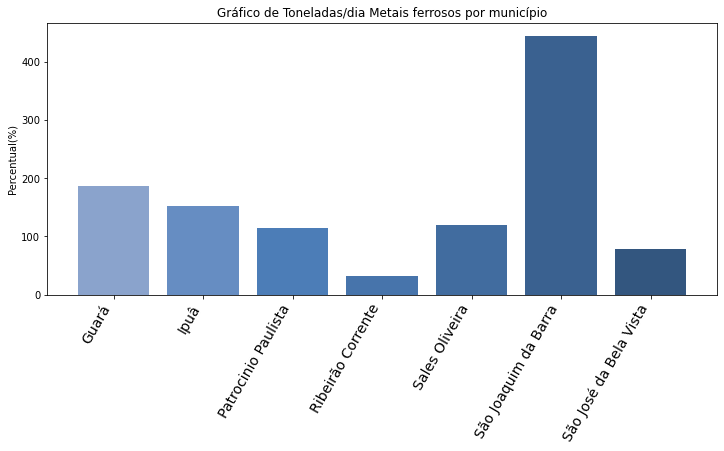

In [332]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia Metais ferrosos por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/toneladas-metais-ferrosos.png', dpi=600, bbox_inches='tight')
plt.show()

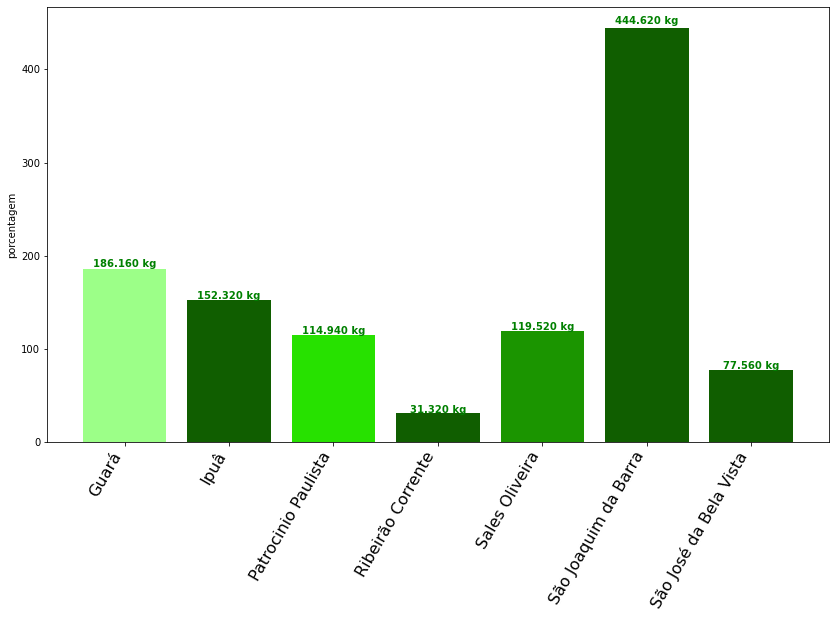

In [333]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/grafico-metais-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

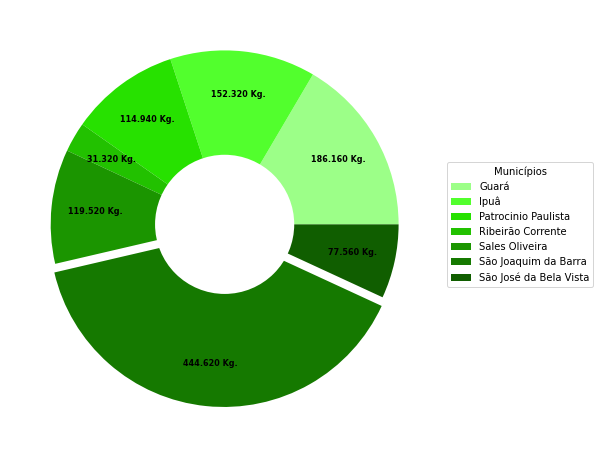

In [334]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-metais-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

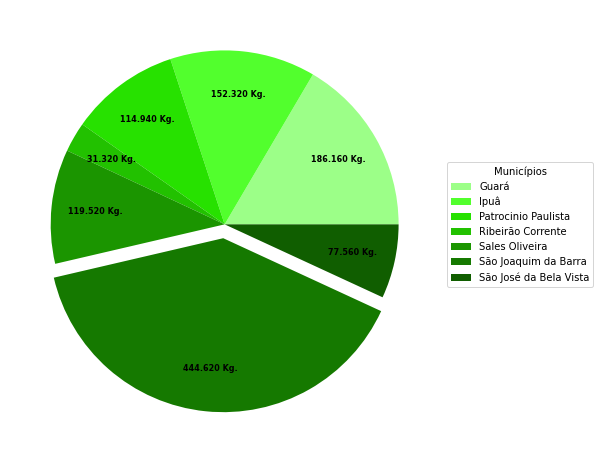

In [335]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/grafico-metais-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## G) Total de Materiais Por Município - Aluminio

In [336]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Alumínio"].sum() * 100)) / 100
cidades = df["Cidade"]

In [337]:
variavel

Cidade
Guará                      85.92
Ipuâ                       54.40
Patrocinio Paulista        57.47
Ribeirão Corrente          13.05
Sales Oliveira             29.88
São Joaquim da Barra      282.94
São José da Bela Vista     38.78
dtype: float64

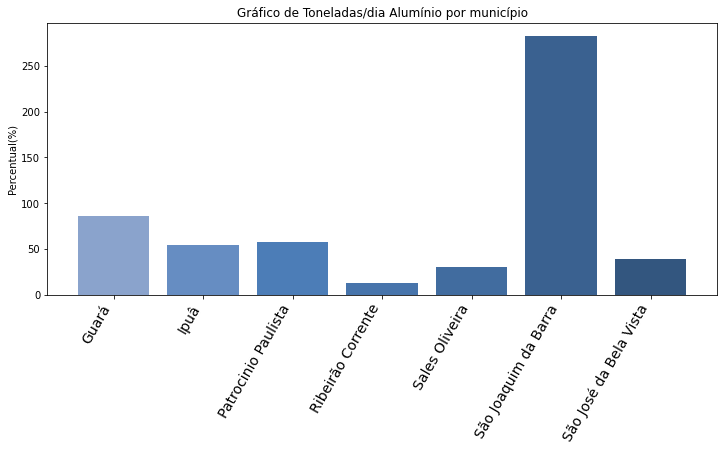

In [338]:
fig, ax = plt.subplots(figsize=(12, 5))

cores = ['#FBCE13', '#06A7ED', '#0CD143', '#F11F2C', '#C2FD0D', '#FA7925', '#B73DB6']

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia Alumínio por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/grafico-aluminio-bar-normal.png', dpi=600, bbox_inches='tight')
plt.show()

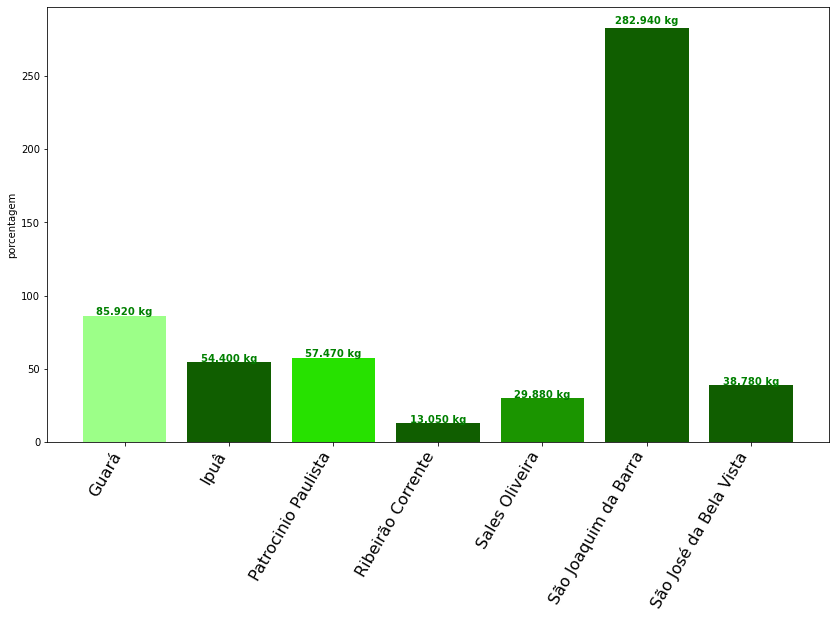

In [339]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/grafico-aluminio-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

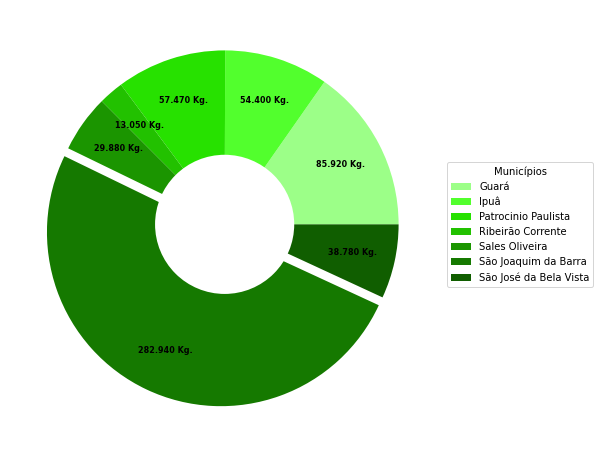

In [340]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-aluminio-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

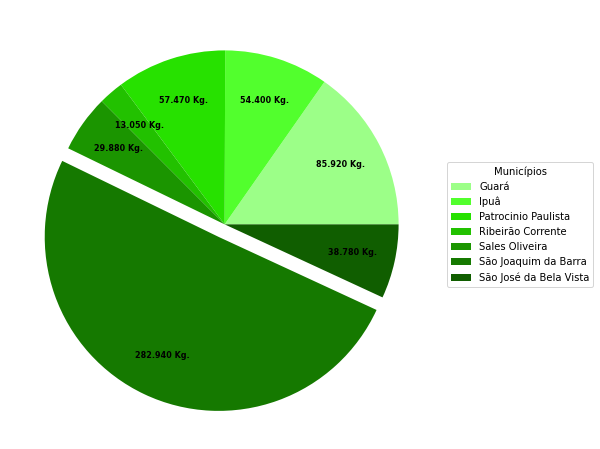

In [341]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/grafico-aluminio-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

## H) Total de Materiais Por Município - Papel Branco

In [342]:
#PET por cidade
variavel = ((df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum() * 1000) * (df.groupby(df["Cidade"])["Papel branco"].sum() * 100)) / 100
cidades = df["Cidade"]

In [343]:
variavel

Cidade
Guará                      443.92
Ipuâ                       359.04
Patrocinio Paulista        254.51
Ribeirão Corrente           83.52
Sales Oliveira             239.04
São Joaquim da Barra      1333.86
São José da Bela Vista     188.36
dtype: float64

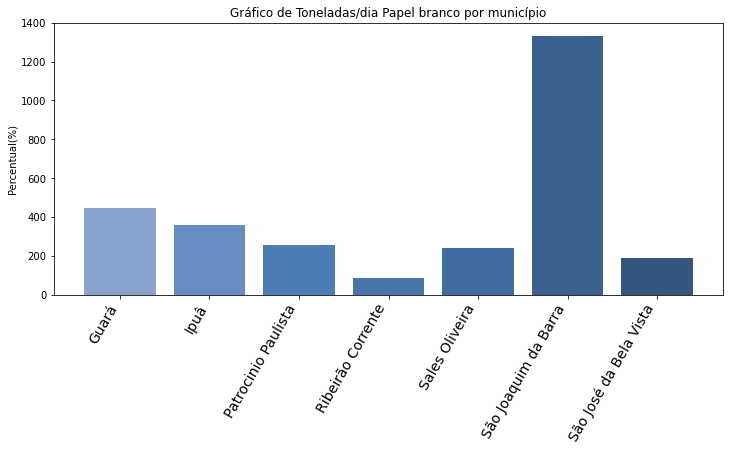

In [344]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(cidades, variavel, color=colors_blue);
ax.set_title('Gráfico de Toneladas/dia Papel branco por município')
ax.set_ylabel('Percentual(%)')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=14,
         horizontalalignment='right')

plt.savefig('imagens/grafico-papel-branco-bar-normal.png', dpi=600, bbox_inches='tight')
plt.show()

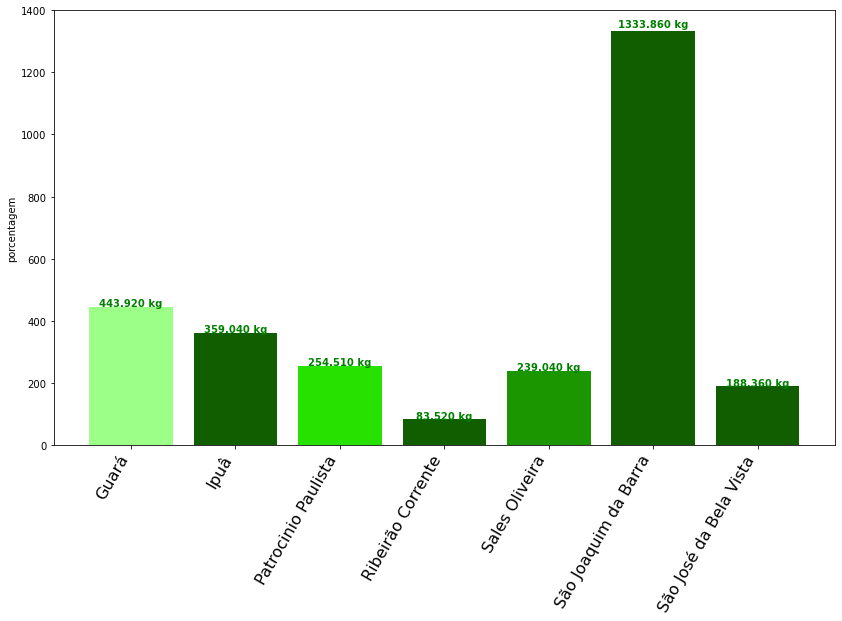

In [345]:

fig, ax = plt.subplots(figsize=(14, 8))
colors_green = ['#9CFF88', '#52FF2D', '#27E100', '#22C100', '#1B9500', '#157900', '#105E00']

graph = ax.bar(cidades, variavel, color=['#9CFF88', '#105E00', '#27E100', '#105E00', '#1B9500', '#105E00', '#105E00'])
#plt.title('Exemplo com porcentagem de PET')
#plt.xlabel('cidades')
plt.ylabel('porcentagem')

# get axis tick labels
labels = ax.get_xticklabels()

plt.setp(labels,
         rotation=60, 
         size=16,
         horizontalalignment='right')

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             '{:1.3f} kg'.format(variavel[i]),
             color='green',
             ha='center',
             weight='bold')
    i+=1

plt.savefig('imagens/grafico-papel-branco-bar-topo.png', dpi=600, bbox_inches='tight')


plt.show()

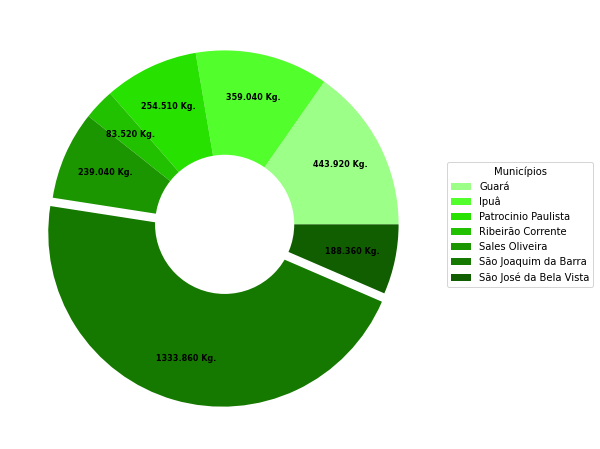

In [346]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  textprops=dict(color="black"),
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.05, 0],
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

# draw circle
centre_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.savefig('imagens/grafico-papel-branco-rosca-kg.png', dpi=600, bbox_inches='tight')

plt.show()

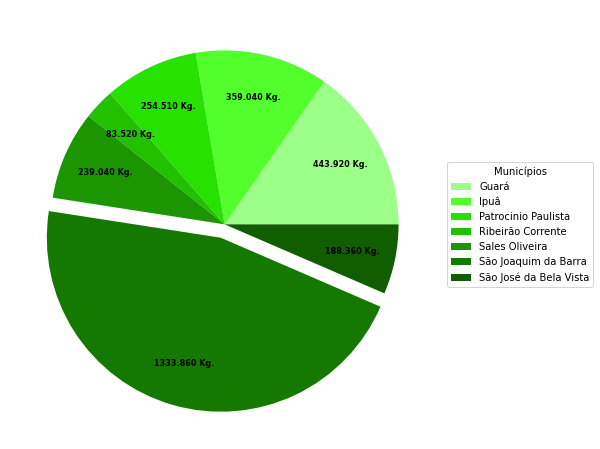

In [347]:
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(aspect="equal"))

data = variavel

wedges, texts, autotexts = ax.pie(variavel, 
                                  autopct=lambda v:f"{sum(variavel)*v/100:.3f} Kg.", 
                                  pctdistance=0.75,
                                  colors=colors_green,
                                  explode = [0, 0, 0, 0, 0, 0.08, 0],
                                  textprops = dict(color="black")
                                 )


ax.legend(wedges, cidades,
          title="Municípios",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

plt.savefig('imagens/grafico-papel-branco-pizza.png', dpi=600, bbox_inches='tight')

plt.show()

# 9. TESTES DIVERSOS

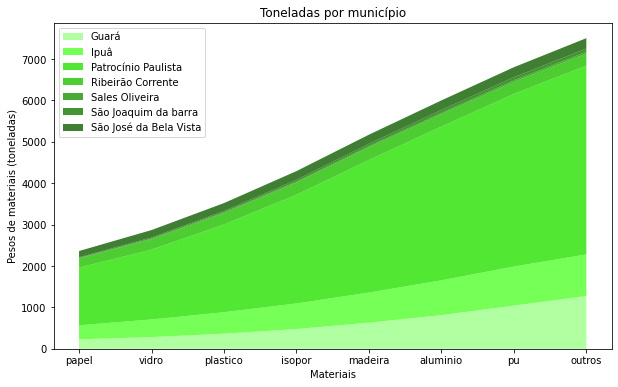

In [348]:
import numpy as np
import matplotlib.pyplot as plt

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
#year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
material = ['papel', 'vidro', 'plastico', 'isopor', 'madeira', 'aluminio', 'pu', 'outros']
population_by_continent = {
    'Guará': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'Ipuâ': [340, 425, 519, 619, 727, 840, 943, 1006],
    'Patrocínio Paulista': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'Ribeirão Corrente': [220, 253, 276, 295, 310, 303, 294, 293],
    'Sales Oliveira': [12, 15, 19, 22, 26, 31, 36, 39],
    'São Joaquim da barra': [18, 25, 32, 44, 56, 68, 75, 80],
    'São José da Bela Vista': [150, 180, 189, 210, 220, 230, 240, 250],
}

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(10, 6))
ax.stackplot(material, population_by_continent.values(),
             labels=population_by_continent.keys(), alpha=0.8, colors=colors_green)
ax.legend(loc='upper left')
ax.set_title('Toneladas por município')
ax.set_xlabel('Materiais')
ax.set_ylabel('Pesos de materiais (toneladas)')

plt.savefig('imagens/toneladas-por-municipio.png', dpi=600, bbox_inches='tight')

plt.show()

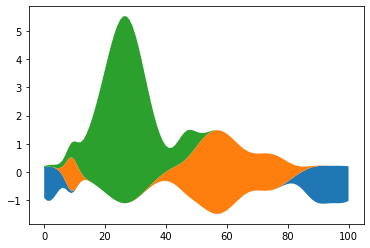

In [349]:
# Fixing random state for reproducibility
np.random.seed(19680801)

def gaussian_mixture(x, n=5):
    """Return a random mixture of *n* Gaussians, evaluated at positions *x*."""
    def add_random_gaussian(a):
        amplitude = 1 / (.1 + np.random.random())
        dx = x[-1] - x[0]
        x0 = (2 * np.random.random() - .5) * dx
        z = 10 / (.1 + np.random.random()) / dx
        a += amplitude * np.exp(-(z * (x - x0))**2)
    a = np.zeros_like(x)
    for j in range(n):
        add_random_gaussian(a)
    return a


x = np.linspace(0, 100, 101)
ys = [gaussian_mixture(x) for _ in range(3)]

fig, ax = plt.subplots()
ax.stackplot(x, ys, baseline='wiggle')
plt.show()

In [350]:
#Vidros por cidade
variavel = df.groupby(df["Cidade"])["Vidros"].sum()
cidades = df["Cidade"]

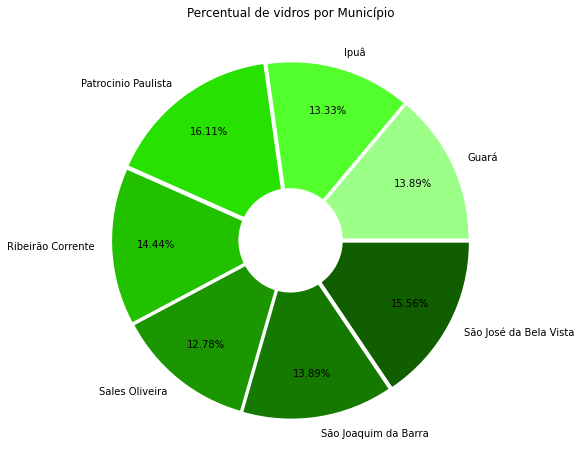

In [351]:
fig, ax = plt.subplots(figsize=(16, 8))
  
# Pie Chart
plt.pie(variavel, colors=colors_green, labels=cidades,
        autopct='%1.2f%%', pctdistance=0.75,
        explode=variavel)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
plt.title('Percentual de vidros por Município')
plt.show() 

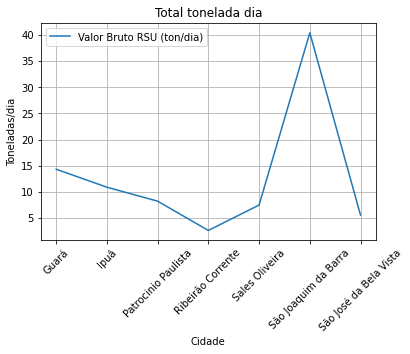

In [352]:
df.groupby(df["Cidade"])["Valor Bruto RSU (ton/dia)"].sum().plot(title = 'Total tonelada dia')
plt.xlabel("Cidade")
plt.ylabel("Toneladas/dia");

plt.xticks(rotation=45)
plt.grid(True)

plt.legend()

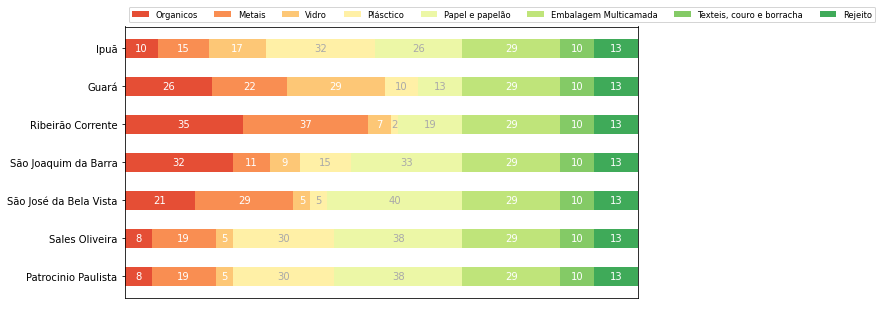

In [353]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Organicos', 'Metais','Vidro', 'Plásctico', 'Papel e papelão', 'Embalagem Multicamada',
                  'Texteis, couro e borracha', 'Rejeito']
results = {
    'Ipuã': [10, 15, 17, 32, 26, 29, 10, 13],
    'Guará': [26, 22, 29, 10, 13, 29, 10, 13],
    'Ribeirão Corrente': [35, 37, 7, 2, 19, 29, 10, 13],
    'São Joaquim da Barra': [32, 11, 9, 15, 33, 29, 10, 13],
    'São José da Bela Vista': [21, 29, 5, 5, 40, 29, 10, 13],
    'Sales Oliveira': [8, 19, 5, 30, 38, 29, 10, 13],
    'Patrocinio Paulista': [8, 19, 5, 30, 38, 29, 10, 13]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

  cidades  toneladas
0       A         14
1       B         10
2       C          8
3       D          2
4       E          7
5       F         40
6       G          5


[Text(0, 0, '14'),
 Text(0, 0, '10'),
 Text(0, 0, '8'),
 Text(0, 0, '2'),
 Text(0, 0, '7'),
 Text(0, 0, '40'),
 Text(0, 0, '5')]

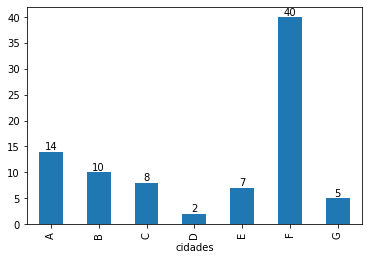

In [354]:
#create DataFrame
df3 = pd.DataFrame({'cidades': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
                   'toneladas': [14, 10, 8, 2, 7, 40, 5]})

#view DataFrame
print(df3)

 
#create bar plot to visualize sales by product
ax = df3.plot.bar(x='cidades', y='toneladas', legend=False)

#annotate bars
ax.bar_label(ax.containers[0])

Rectangle(xy=(-0.4, 0), width=0.8, height=14.32, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=10.88, angle=0)
Rectangle(xy=(1.6, 0), width=0.8, height=8.21, angle=0)
Rectangle(xy=(2.6, 0), width=0.8, height=2.61, angle=0)
Rectangle(xy=(3.6, 0), width=0.8, height=7.47, angle=0)
Rectangle(xy=(4.6, 0), width=0.8, height=40.42, angle=0)
Rectangle(xy=(5.6, 0), width=0.8, height=5.54, angle=0)


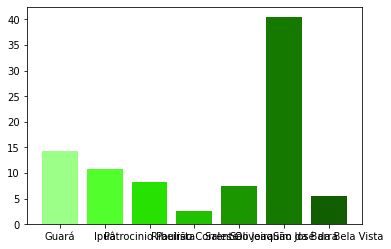

In [355]:
#Visualizando somente cidades e total de tonelada
cidade = df['Cidade']
tonelada = df['Valor Bruto RSU (ton/dia)']
plot = plt.bar(cidade, tonelada, color=colors_green)
for i in plot.patches:
    print(i)
#    plot.annotate(i.get_height(),
#                  (i.get_x() + i.get_width() / 2, i.get_height()), 
#                  ha='center', va='baseline', fontsize=12, 
#                  color='black', xytext=(0,1), 
#                  textcoords='offset points')    

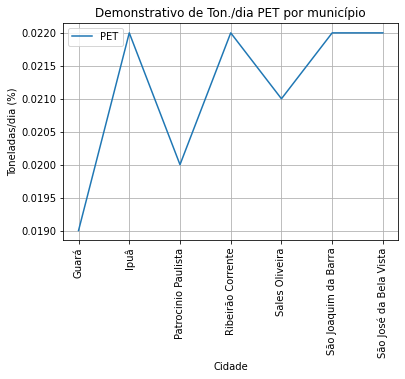

In [356]:
df.groupby(df["Cidade"])["PET"].sum().plot(title = 'Demonstrativo de Ton./dia PET por município')
plt.xlabel("Cidade")
plt.ylabel("Toneladas/dia (%)");

plt.xticks(rotation=90)
plt.grid(True)

plt.savefig('imagens/histograma-toneladas-pets.png', dpi=600, bbox_inches='tight')
plt.legend()